### Dummy attempt just using DJIA_table data

In [2]:
from data_preparation_utilities import read_csv_from_zip

Combined_News_DJIA, DJIA_table, RedditNews, Test_dates = read_csv_from_zip()

Mean Squared Error: 3.7996656607117446e-05
(373,)


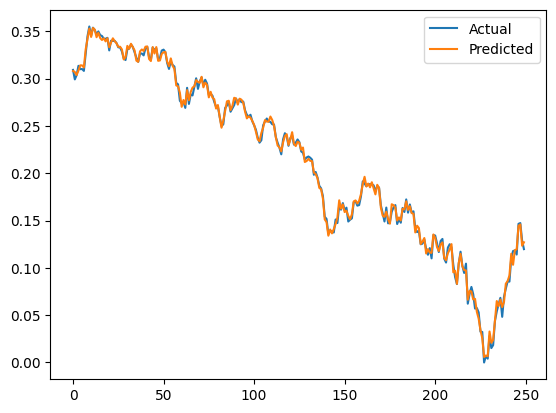

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

df = DJIA_table

# Feature selection
features = df.drop(['Date', 'Close', 'Adj Close'], axis=1)
target = df['Close']*10**5

features = (features - features.min()) / (features.max() - features.min())
target = (target - target.min()) / (target.max() - target.min())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Optional: Plot actual vs. predicted prices
import matplotlib.pyplot as plt

print(y_test.values.shape)

plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.show()